In [7]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt


#from scipy import stats
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso

from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import Ridge.Lasso
#from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import cross_val_score


#import statsmodels.api as sm

In [8]:
A=pd.read_csv('/Users/ranvir/Desktop/50_Startups.csv')
A.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


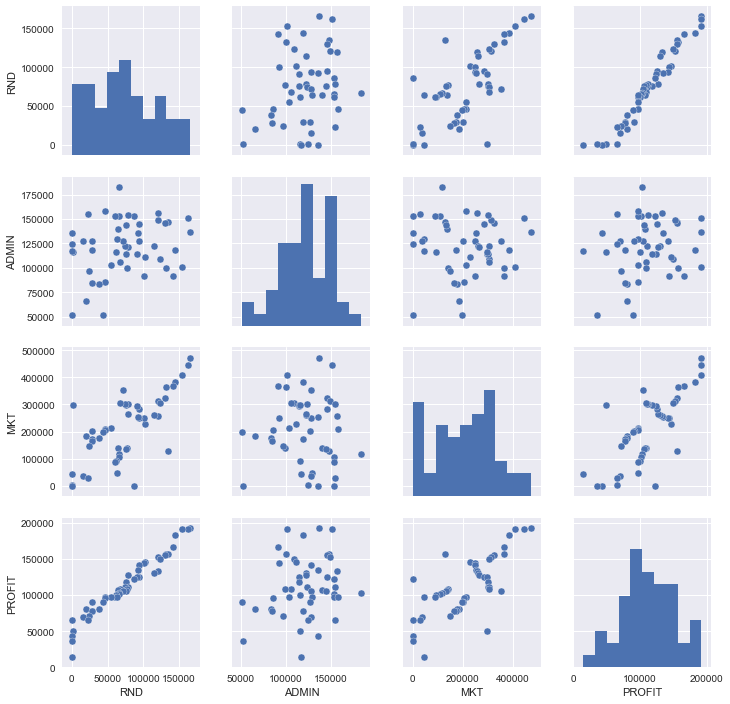

In [9]:
sn.pairplot(A)
#show a clear collinearity
plt.show()

In [10]:
A.corr()

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


In [11]:

dummy=pd.get_dummies(A.STATE)
dummy
B=A.join(dummy)
B.head()

,RND,ADMIN,MKT,STATE,PROFIT,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


In [12]:
X=B[['RND','MKT','ADMIN','California','Florida','New York']]
Y=B[['PROFIT']]
xtrain,xtest,ytrain,ytest= train_test_split(X,Y,test_size=0.20,random_state=40)

In [17]:
lin_reg=LinearRegression()
MSEs=cross_val_score(lin_reg,X,Y,scoring='neg_mean_squared_error',cv=5)
mean_MSE=np.mean(MSEs)
print(mean_MSE)


-103214540.655


In [18]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-4,1e-2,1,5,10,20]}
ridge_reg=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)

model1=ridge_reg.fit(X,Y)


C:\Users\ranvir\Anaconda2\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.78655719083e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\ranvir\Anaconda2\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.77164083925e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\ranvir\Anaconda2\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.60098362125e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\ranvir\Anaconda2\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is

In [21]:
model1
print(model1.best_params_)
print(model1.best_score_)



{'alpha': 20}
-97940997.5127


In [24]:
from sklearn.linear_model import Lasso
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-4,1e-2,1,5,10,20]}
lasso_regression=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
model2=lasso_regression.fit(X,Y)



print (model2)
print(model2.best_params_)
print(model2.best_score_)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.01, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)
{'alpha': 20}
-102772499.748


In [93]:
y_pred=model1.predict(xtest)
y_pred

array([[  97979.02744242],
       [ 101761.85289581],
       [  48202.6109734 ],
       [  69656.83498413],
       [  47622.53353709],
       [ 192463.44449807],
       [ 129073.54751526],
       [ 172199.84537524],
       [ 135554.77598498],
       [ 182203.81131507]])

In [107]:

#df = pd.DataFrame({'Predicted': y_pred,'Actual': ytest.reshape((1,-1))}) 
#df

#y_pred for model1 by RIDGE REGRESSION
print (y_pred)
print(ytest)

[  97997.65712381  101765.51044471   48188.10672636   69659.04303571
   47629.08147453  192457.50841364  129089.99327053  172215.182219
  135535.77803317  182217.84000406]
       PROFIT
33   96778.92
29  101004.64
49   14681.40
38   81229.06
45   64926.08
0   192261.83
18  124266.90
4   166187.94
11  144259.40
2   191050.39


In [108]:
# APPLYIN ON model2
y_pred=model2.predict(xtest)


In [109]:
df = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred}) 
df


,Actual,Predicted
0,"(P, R, O, F, I, T)",97997.657124
1,"(P, R, O, F, I, T)",101765.510445
2,"(P, R, O, F, I, T)",48188.106726
3,"(P, R, O, F, I, T)",69659.043036
4,"(P, R, O, F, I, T)",47629.081475
5,"(P, R, O, F, I, T)",192457.508414
6,"(P, R, O, F, I, T)",129089.993271
7,"(P, R, O, F, I, T)",172215.182219
8,"(P, R, O, F, I, T)",135535.778033
9,"(P, R, O, F, I, T)",182217.840004
